lmfit Version
===

Extracting a signal from two datasets.
---
Below we simulate two experiments.

Experiment1:
- has a gaussian signal
- and a falling background that goes as $exp^{-x/\lambda}$

Experinemt2:
- has the same gaussian signal component
- and a background that goes as $x^n$, where $n$<0

In [5]:
import numpy as np
from lmfit import minimize, Parameters
import matplotlib.pyplot as plt

In [8]:
# we'll use ROOT rot his par b/c it's easier, but return numpy arrays instead of histograms
import ROOT as r

tfsig=r.TF1("tfsig","exp(-0.5*(x-[0])*(x-[0])/[1]/[1])",25,125)
tfsig.SetParameters(75,4.5)

# a basic function to convert ROOT histograms into numpy arrays
def hist2np(h):
    nbin=h.GetNbinsX()
    x=np.zeros(nbin)
    y=np.zeros(nbin)
    ey=np.zeros(nbin)
    for i in range(1,nbin+1):  # bin index is 1..N
        x[i-1]=h.GetBinCenter(i)
        y[i-1]=h.GetBinContent(i)
        ey[i-1]=h.GetBinError(i)
    return x,y,ey

def experiment1():
    S_over_N = 0.08
    ndata=2700
    lam=20
    range=(30,100)
    background = r.TF1("back1","exp(-x/[0])",range[0],range[1])
    background.SetParameter(0,lam)
    hist = r.TH1F("hexp1","Experiment1;x;frequency",50,range[0],range[1])
    nsig=int(ndata*S_over_N)
    nbkg=ndata-nsig
    hist.FillRandom("tfsig",nsig)
    hist.FillRandom("back1",nbkg)
    return hist2np(hist)

def experiment2():
    S_over_N = 0.12
    ndata=2500   
    n=-2.2
    range=(50,100)
    background = r.TF1("back2","pow(x,[0])",range[0],range[1])
    background.SetParameter(0,n)
    hist = r.TH1F("hexp2","Experiment2;x;frequency",50,range[0],range[1])
    nsig=int(ndata*S_over_N)
    nbkg=ndata-nsig
    hist.FillRandom("tfsig",nsig)
    hist.FillRandom("back2",nbkg)
    return hist2np(hist)

In [9]:
x1,y1,e1=experiment1()
x2,y2,e2=experiment2()

<ErrorbarContainer object of 3 artists>

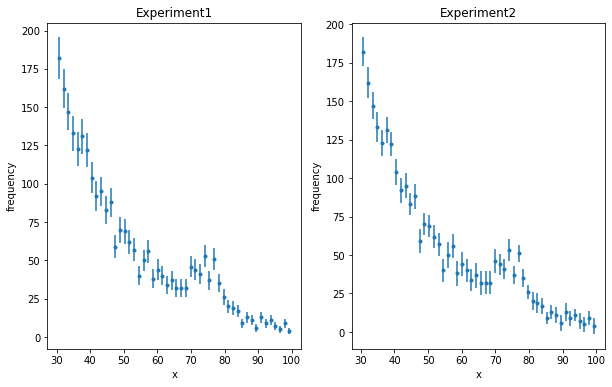

In [17]:
# Plot the histogram data with error bars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.set_title('Experiment1')
ax1.set_xlabel('x')
ax1.set_ylabel('frequency')

ax2.set_title('Experiment2')
ax2.set_xlabel('x')
ax2.set_ylabel('frequency')

ax1.errorbar(x1, y1, yerr=e1, fmt='.')
ax2.errorbar(x1, y1, yerr=e2, fmt='.')


You job for this project will be to develop a simultaneous fit for the two histograms using minuit.  See this week's exercise description for more details.